# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

import warnings
warnings.filterwarnings('ignore')

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [229]:
import pandas as pd
import numpy as np
import os,sys
from scipy import stats
# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [138]:
#Load data
loan_df = pd.read_csv('C:\\Users\\garrettikekhua\\Downloads\\PGD-AIML\\Program Content\\Supervised Learning\\Week-2 Logistic Regression\\Project Supervised Learning - Personal Loan Campaign Modelling\\Bank_Personal_Loan_Modelling.csv')

# 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
 Number of unique in each column?
 Number of people with zero mortgage?
 Number of people with zero credit card spending per month?
 Value counts of all categorical columns.
 Univariate and Bivariate
 Get data model ready

In [139]:
#cr_df = df.drop('Loan_ID', axis =1 )
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [140]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [141]:
loan_df.shape

(5000, 14)

In [142]:
loan_df.drop(['ID','ZIP Code'], axis=1, inplace=True)

In [143]:
loan_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.60,1,0,0,1,0,0,0
1,45,19,34,3,1.50,1,0,0,1,0,0,0
2,39,15,11,1,1.00,1,0,0,0,0,0,0
3,35,9,100,1,2.70,2,0,0,0,0,0,0
4,35,8,45,4,1.00,2,0,0,0,0,0,1


In [163]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [201]:
loan_df.isnull().values.any()

False

### Number of unique in each column?

In [127]:
print('Unique Age--',loan_df['Age'].unique())
print()      
print('Unique Experience--',loan_df['Experience'].unique())
print()
print('Unique income--',loan_df['Income'].unique())
print()
print('Unique Family--',loan_df['Family'].unique())
print()
print('Unique CCAvg--',loan_df['CCAvg'].unique())
print()
print('Unique Education--',loan_df['Education'].unique())
print()
print('Unique Mortgage--',loan_df['Mortgage'].unique())
print()
print('Unique Personal loan--',loan_df['Personal Loan'].unique())
print()
print('Unique Securities Account--',loan_df['Securities Account'].unique())
print()
print('Unique CD Account--',loan_df['CD Account'].unique())
print()
print('Unique online--',loan_df['Online'].unique())
print()
print('Unique CreditCard--',loan_df['CreditCard'].unique())



Unique Age-- [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

Unique Experience-- [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

Unique income-- [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]

Unique F

In [177]:
# Rename some Columns 
loan_df_nw = loan_df.rename(columns = {"Personal Loan": "Personal_Loan", 
                                       "Securities Account":"Securities_Account", 
                                       "CD Account": "CD_Account"}) 

### Number of people with zero mortgage?

In [202]:
loan_df['Mortgage'].isin([0]).sum()

3462

### Number of people with zero credit card spending per month

In [129]:

loan_df['CCAvg'].isin([0]).sum()

106

### Value counts of all categorical columns.

In [200]:
print(pd.value_counts(loan_df_nw.Education))
print(loan_df_nw['Education'].value_counts(normalize=True))

1    2096
3    1501
2    1403
Name: Education, dtype: int64
1   0.42
3   0.30
2   0.28
Name: Education, dtype: float64


In [193]:
print(pd.value_counts(loan_df_nw.Personal_Loan))
print(loan_df_nw['Personal_Loan'].value_counts(normalize=True))

0    4520
1     480
Name: Personal_Loan, dtype: int64
0   0.90
1   0.10
Name: Personal_Loan, dtype: float64


In [196]:
print(pd.value_counts(loan_df_nw.Securities_Account))
print(loan_df_nw['Securities_Account'].value_counts(normalize=True))

0    4478
1     522
Name: Securities_Account, dtype: int64
0   0.90
1   0.10
Name: Securities_Account, dtype: float64


In [197]:
print(pd.value_counts(loan_df_nw.CD_Account))
print(loan_df_nw['CD_Account'].value_counts(normalize=True))

0    4698
1     302
Name: CD_Account, dtype: int64
0   0.94
1   0.06
Name: CD_Account, dtype: float64


In [198]:
print(pd.value_counts(loan_df_nw.Online))
print(loan_df_nw['Online'].value_counts(normalize=True))

1    2984
0    2016
Name: Online, dtype: int64
1   0.60
0   0.40
Name: Online, dtype: float64


In [199]:
print(pd.value_counts(loan_df_nw.CreditCard))
print(loan_df_nw['CreditCard'].value_counts(normalize=True))

0    3530
1    1470
Name: CreditCard, dtype: int64
0   0.71
1   0.29
Name: CreditCard, dtype: float64


### Univariate and Bivariate

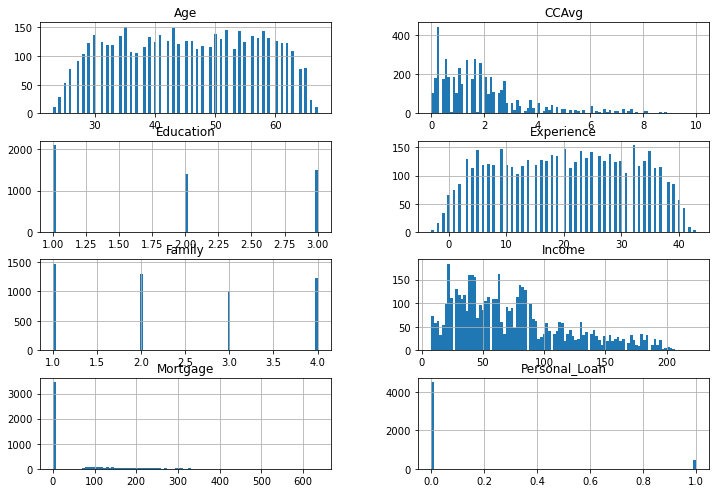

In [204]:
columns = list(loan_df_nw)[0:8] # Excluding Outcome column which has only 
loan_df_nw[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [205]:
loan_df_nw.corr() # It will show correlation matrix 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.00,0.99,-0.06,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,0.99,1.00,-0.05,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.06,-0.05,1.00,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
Family,-0.05,-0.05,-0.16,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.05,-0.05,0.65,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.04,0.01,-0.19,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,0.21,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal_Loan,-0.01,-0.01,0.50,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00
Securities_Account,-0.00,-0.00,-0.00,0.02,0.02,-0.01,-0.01,0.02,1.00,0.32,0.01,-0.02
CD_Account,0.01,0.01,0.17,0.01,0.14,0.01,0.09,0.32,0.32,1.00,0.18,0.28


In [221]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=16):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

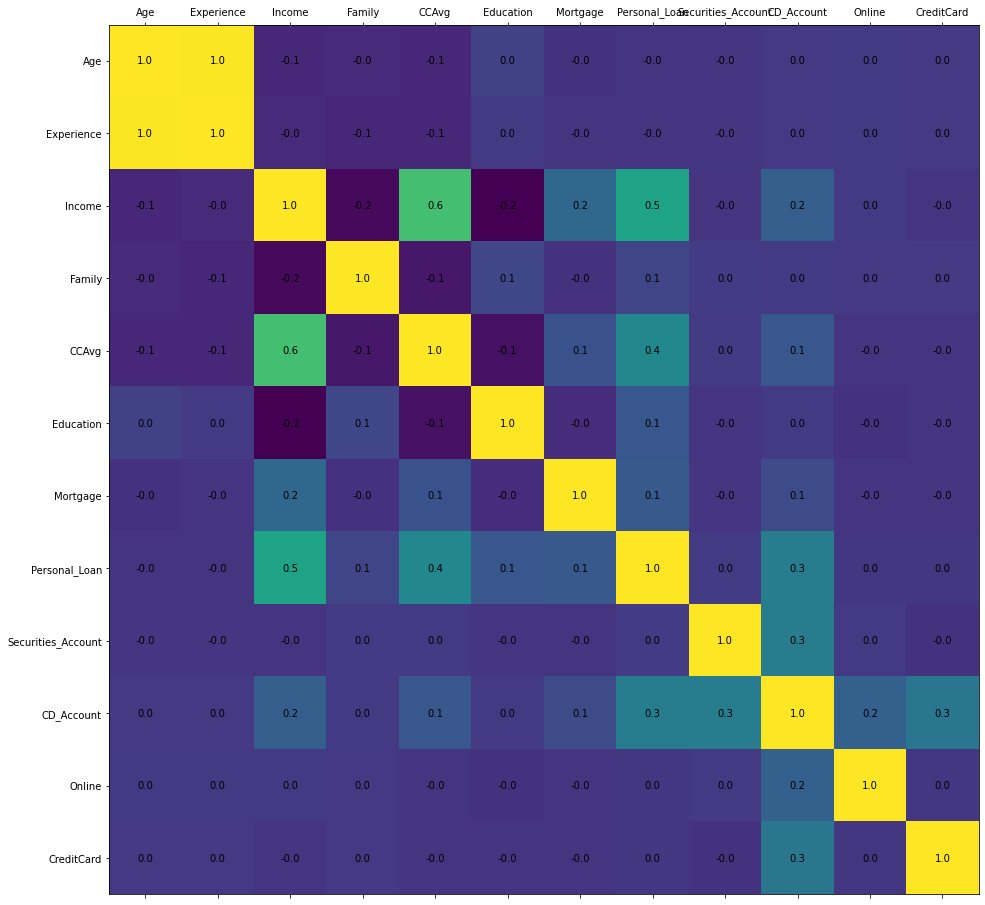

In [222]:
plot_corr(loan_df_nw)

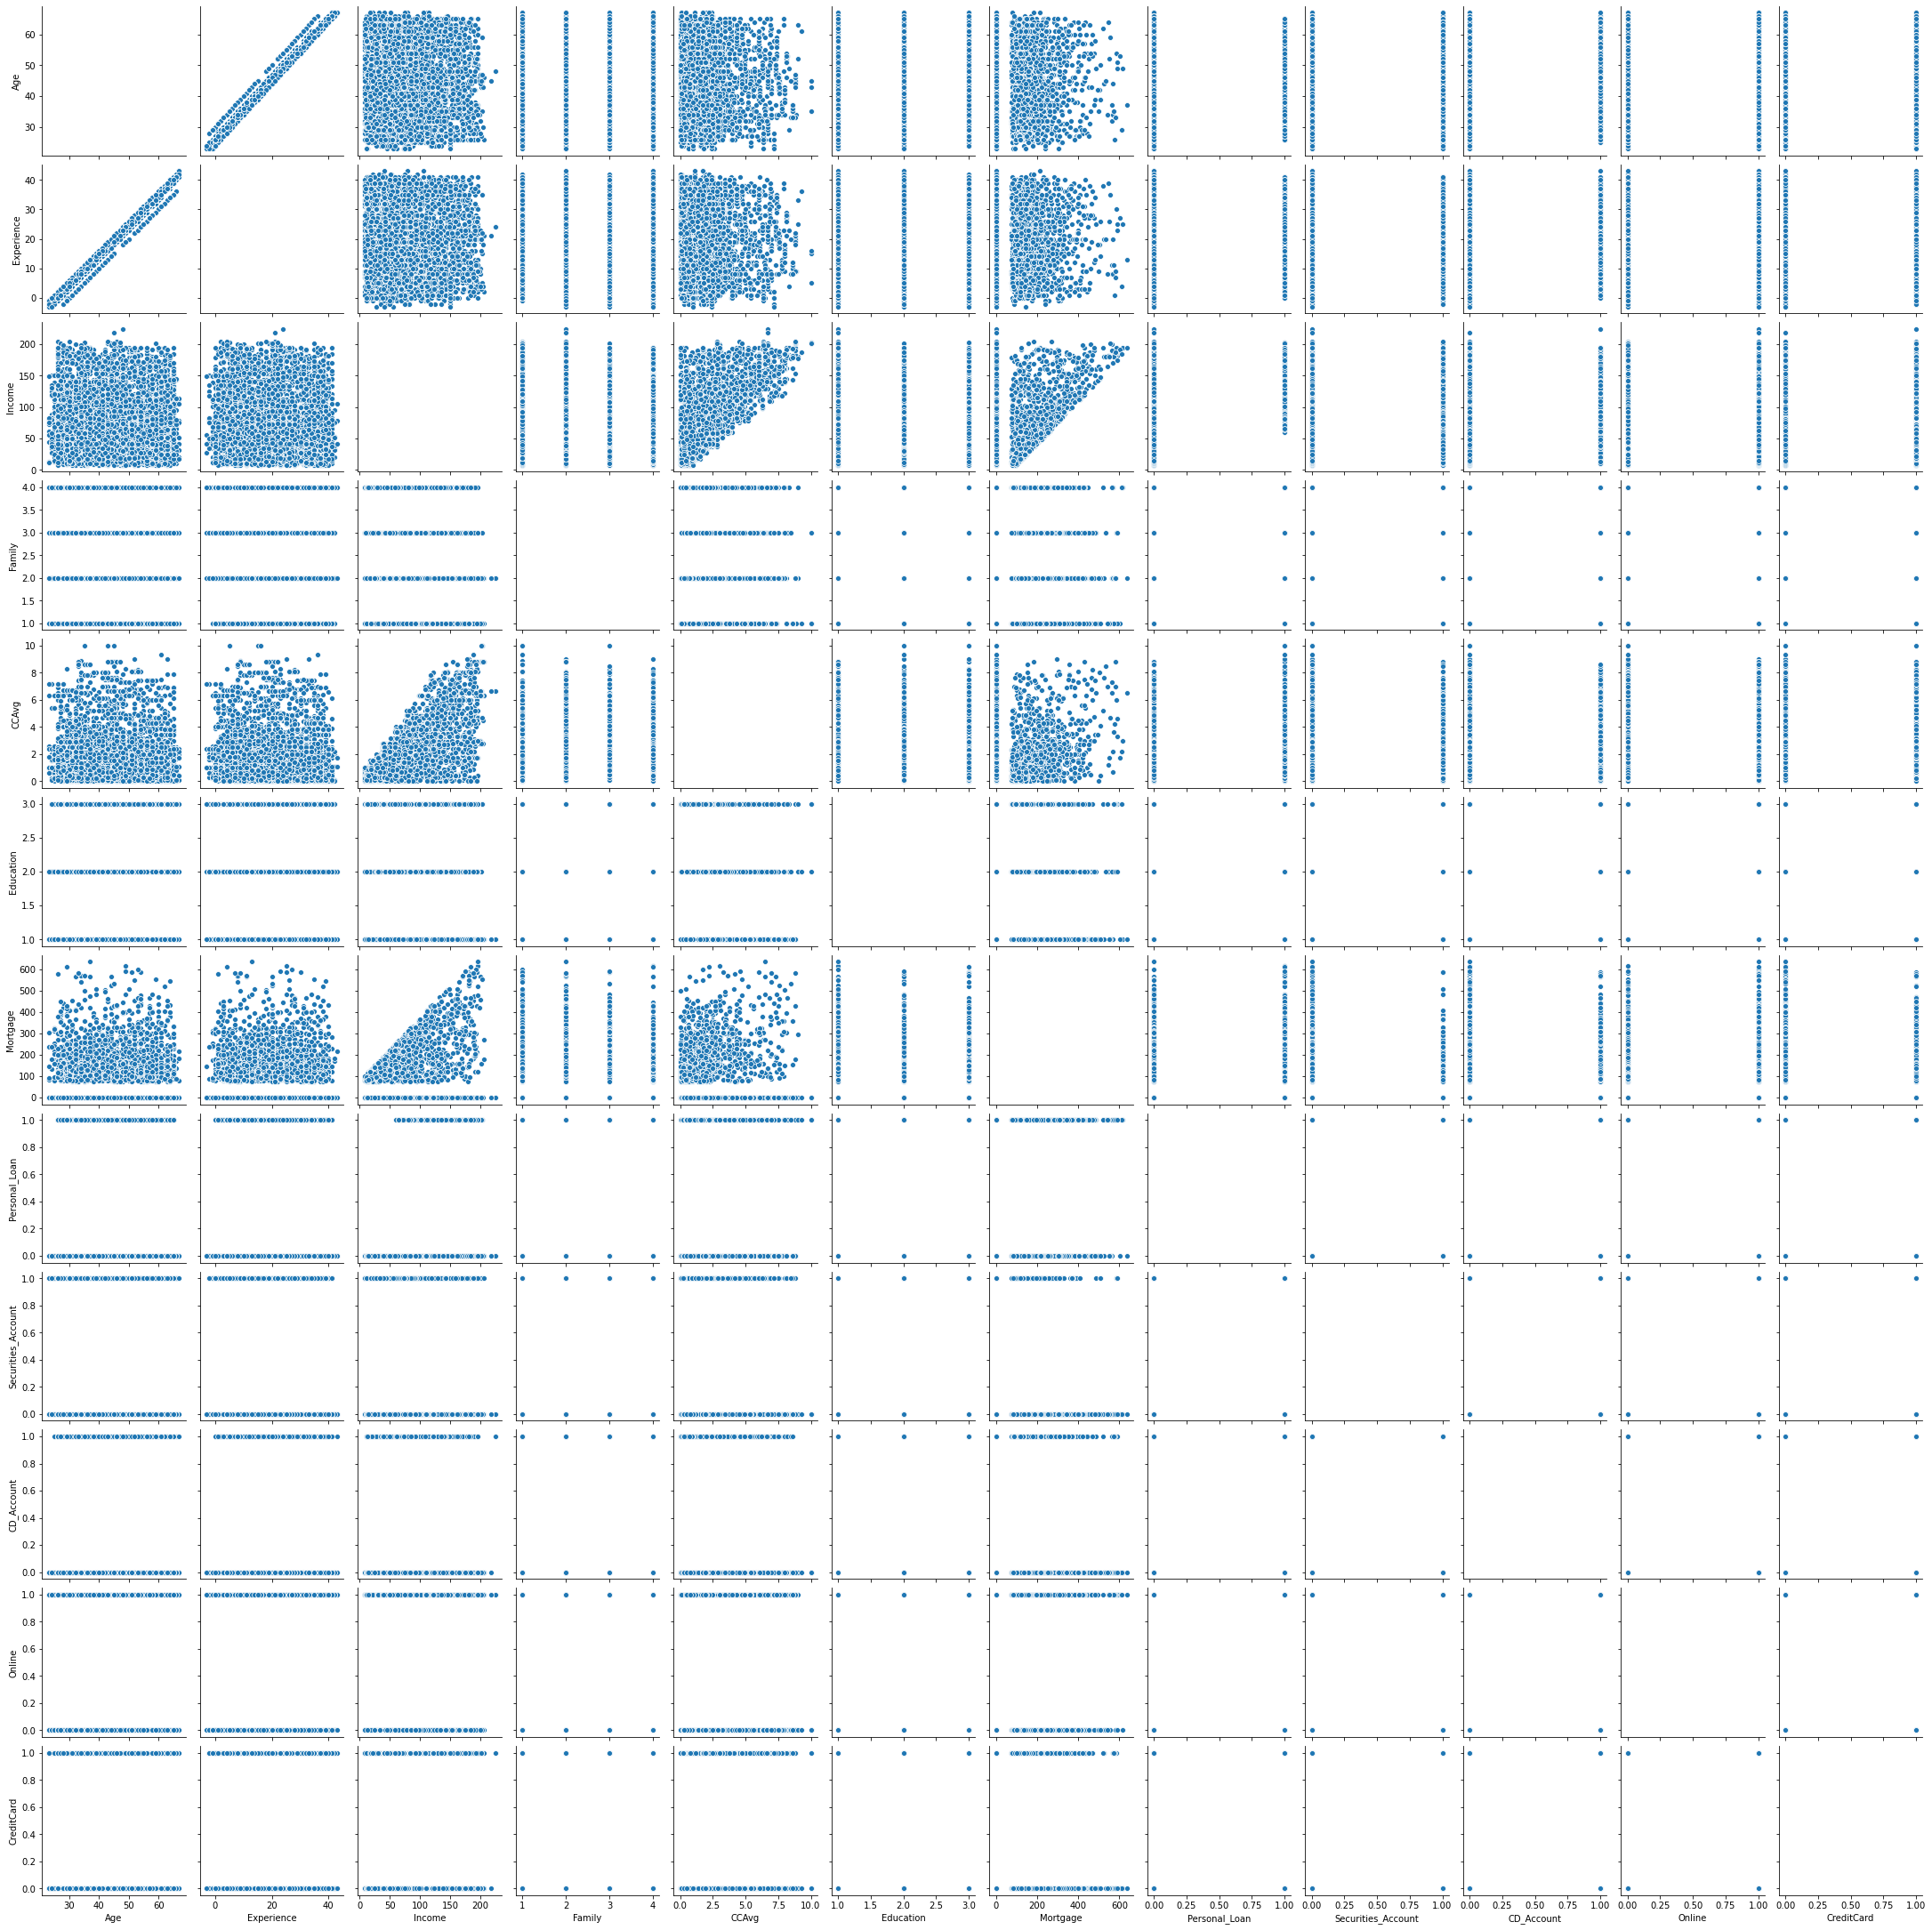

In [231]:
sns.pairplot(loan_df_nw,diag_kind='1')

In [234]:
#Lets analysze the distribution of the various attribute
loan_df_nw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal_Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities_Account,"5,000.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD_Account,"5,000.00",0.06,0.24,0.00,0.00,0.00,0.00,1.00


### Get data model ready

In [238]:
#Convert needed variable to Categorical variable

loan_df_nw['Education'] = loan_df_nw['Education'].astype('category')
loan_df_nw['Personal_Loan'] = loan_df_nw['Personal_Loan'].astype('category')
loan_df_nw['Securities_Account'] = loan_df_nw['Securities_Account'].astype('category')
loan_df_nw['CD_Account'] = loan_df_nw['CD_Account'].astype('category')
loan_df_nw['Online'] = loan_df_nw['Online'].astype('category')
loan_df_nw['CreditCard'] = loan_df_nw['CreditCard'].astype('category')

In [239]:
loan_df_nw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.4 KB


In [240]:
# Define X and Y variables

X = loan_df_nw.drop('Personal_Loan', axis=1)
Y = loan_df_nw[['Personal_Loan']]

In [248]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [251]:
X = X.drop(['Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1'], axis=1)

In [252]:
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_1,Education_2,Securities_Account_0,CD_Account_0,Online_0,CreditCard_0
0,25,1,49,4,1.60,0,1,0,0,1,1,1
1,45,19,34,3,1.50,0,1,0,0,1,1,1
2,39,15,11,1,1.00,0,1,0,1,1,1,1
3,35,9,100,1,2.70,0,0,1,1,1,1,1
4,35,8,45,4,1.00,0,0,1,1,1,1,0


# 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [254]:
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=15)
# My random seed number is 15



In [255]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_1,Education_2,Securities_Account_0,CD_Account_0,Online_0,CreditCard_0
1754,50,24,80,4,4.90,0,1,0,1,1,0,1
2638,28,4,45,1,1.00,0,0,0,1,1,0,1
1810,60,34,35,1,0.20,0,1,0,1,1,0,1
292,30,5,38,4,0.80,129,1,0,1,1,0,0
3306,47,22,65,1,2.40,0,1,0,1,1,0,1


In [257]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(loan_df_nw.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(loan_df_nw.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [ ]:
#from sklearn import metrics
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

In [260]:
#from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
#from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [261]:
y_predict = logreg.predict(x_test)

In [262]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9562857142857143

Testing accuracy 0.9513333333333334

Confusion Matrix


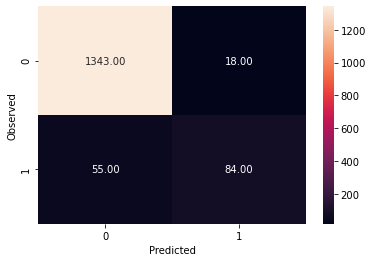

None

Recall: 0.60431654676259

Precision: 0.8235294117647058

F1 Score: 0.6970954356846473

Roc Auc Score: 0.7955454886641752


In [264]:
print("Trainig accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

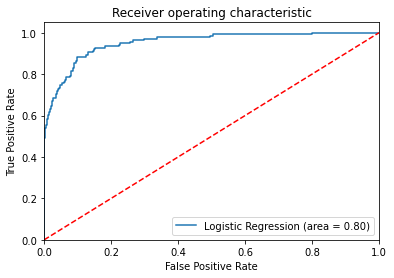

In [266]:
#AUC ROC curve
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 5. Give your reasoning on how can the model perform better? (10 marks)¶
##Hint: Check parameter

In [272]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [273]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.96, 0.956, 0.959, 0.911, 0.909]

[0.953, 0.951, 0.955, 0.912, 0.907]


In [274]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.959, 0.909]

[0.955, 0.907]


In [ ]:
## Highest accuracy is with liblinear in l1 & l2
# I will be using liblinear

In [275]:
# changing class weight to balanced

model = LogisticRegression(random_state=15,penalty='l1',solver='liblinear',class_weight='balanced') 

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Trainig accuracy 0.9042857142857142

Testing accuracy 0.9013333333333333


In [ ]:
## Training & Testing accuracy reduced so, weight is better on None

In [280]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight= None, C=i)  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.921, 0.957, 0.959, 0.959, 0.959, 0.959]

[0.917, 0.954, 0.955, 0.955, 0.955, 0.954]


In [ ]:
## Best testing accuracy is obtained for C=0.25,0.5 0r 0.75 which includes the default

Trainig accuracy 0.9588571428571429

Testing accuracy 0.9546666666666667

Confusion Matrix


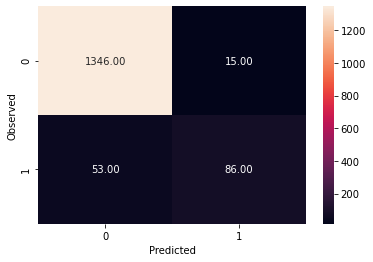

None

Recall: 0.6187050359712231

Precision: 0.8514851485148515

F1 Score: 0.7166666666666667

Roc Auc Score: 0.8038418640546784


In [281]:
#Therefore final model is
model = LogisticRegression(random_state=15,penalty='l1', solver='liblinear', class_weight=None,C=0.5) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [ ]:
## By changing the default parameter of solve from lbfgs to liblinear we improved the model

# 6. Give Business understanding of your model? (5 marks)

### From our Model we are able to have 95% on the test with 85% precision

# END